In [2]:
using LinearAlgebra
using Distributions
using ForwardDiff
using CairoMakie
using ProgressMeter
using KernelDensity
using Interpolations

In [3]:
d = 2
σ = 0.75

m = 1.75
ρ = MixtureModel(MvNormal[
       MvNormal([-m, -m], σ*I),
       MvNormal([m, m], σ*I),
       MvNormal([-m, m], σ*I),
       MvNormal([m, -m], σ*I)]);

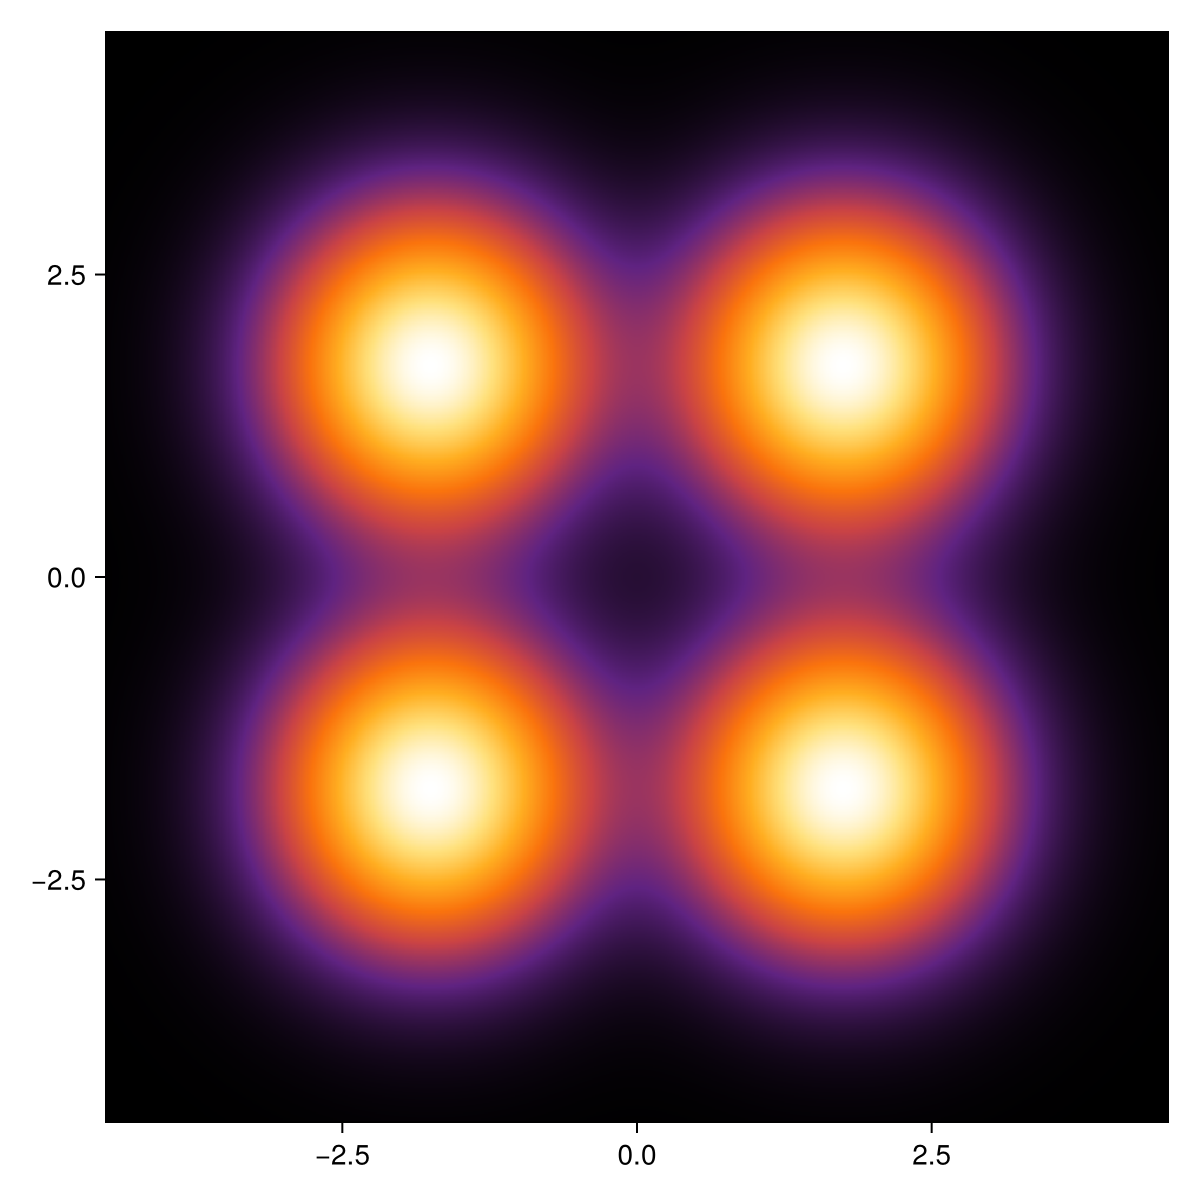

In [4]:
f = Figure(size=(600, 600))
ax = Axis(f[1,1])

x_rng = -4.5:0.01:4.5
heatmap!(x_rng, x_rng, (x,y)-> pdf(ρ, [x, y]), colormap=:sunset)

f

In [5]:
k(x, y) = exp(-norm(x-y)^2)
∇k(x, y) = ForwardDiff.gradient(z->k(z, y), x)
∇logρ(x) = ForwardDiff.gradient(z->logpdf(ρ, z), x)

∇logρ (generic function with 1 method)

In [6]:
function ϕ(P, x)
    Δ = [k(P[:, i], x) * ∇logρ(P[:, i]) + ∇k(P[:, i], x) for i ∈ 1:N]
    mean(Δ)
end

ϕ (generic function with 1 method)

In [7]:
function stein_variational_gradient_descent!(P, η)
    for i ∈ 1:N
        P[:, i] += η * ϕ(P, P[:, i])
    end
end

stein_variational_gradient_descent! (generic function with 1 method)

In [8]:
function plot_stein(P)
    f = Figure(size=(1200, 600))
    ax = Axis(f[1,1], title="Target Density")
    
    x_rng = -4.2:0.01:4.2
    heatmap!(x_rng, x_rng, (x,y)-> pdf(ρ, [x, y]), colormap=:sunset)
    scatter!(P, color=:dodgerblue)
    
    
    ax = Axis(f[1,2], title="Particles KDE")
    
    kde_dist = kde(P')
    ik = InterpKDE(kde_dist)
    heatmap!(x_rng, x_rng, (x,y)-> pdf(ik, x, y), colormap=:sunset)
    f
end

plot_stein (generic function with 1 method)

In [9]:
N = 100
P = rand(MvNormal(zeros(d), 0.5I), N)

2×100 Matrix{Float64}:
  0.286599  0.771      -0.654642  …  -1.65777  -0.26623    0.666621
 -0.447855  0.0157566  -0.233357      0.10384   0.0620569  1.24558

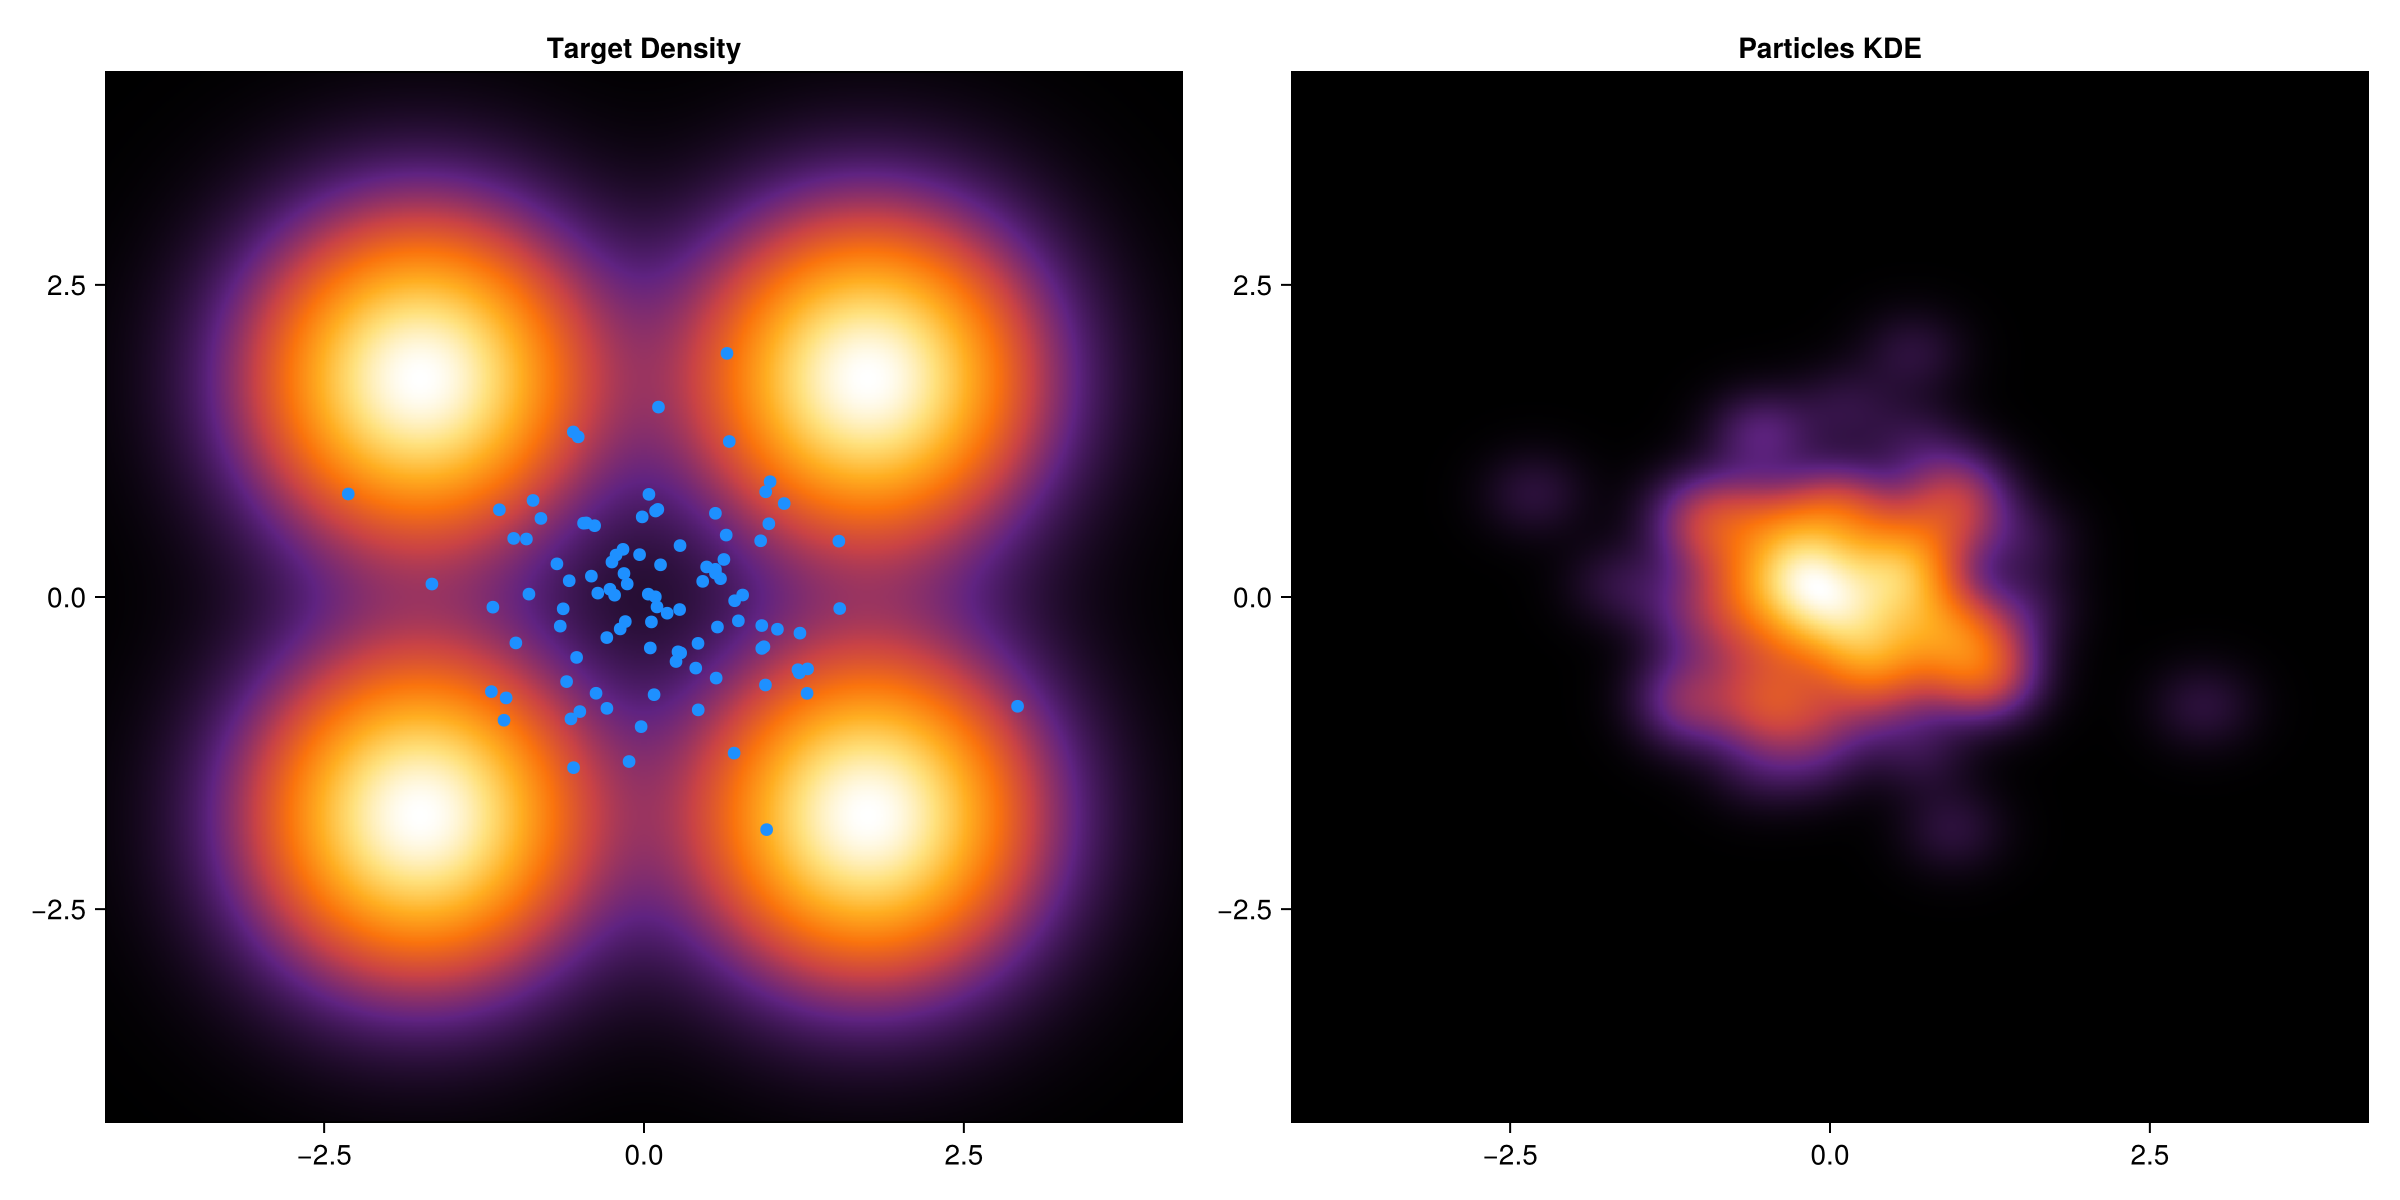

In [10]:
plot_stein(P)

In [11]:
@showprogress for τ ∈ 1:500
    stein_variational_gradient_descent!(P, 0.05)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


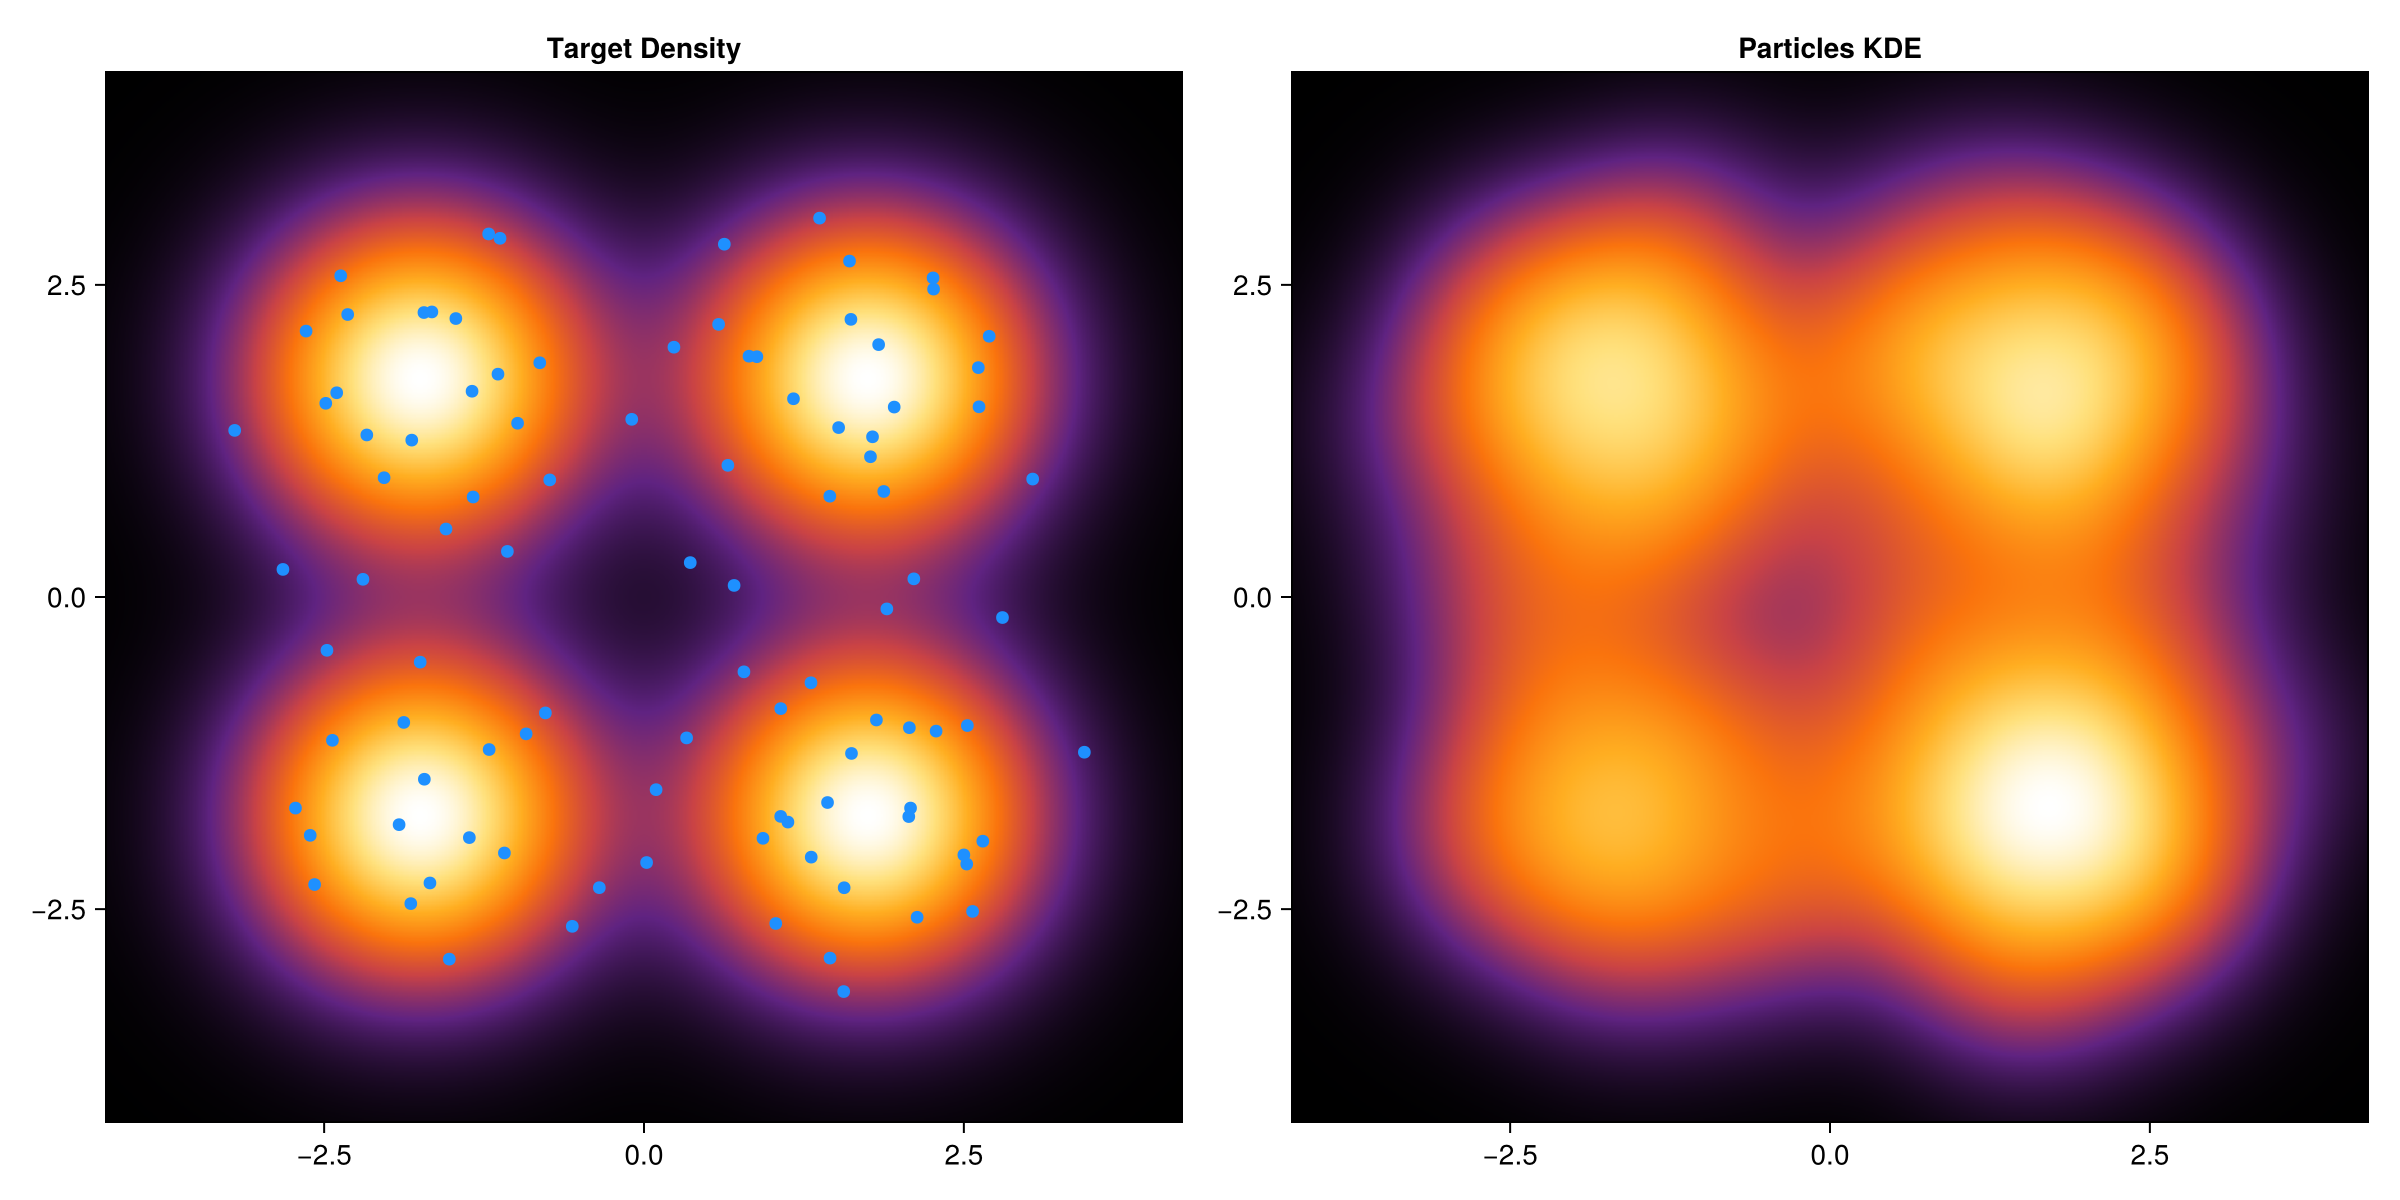

In [12]:
plot_stein(P)